## Setup

In [47]:
#pip install --upgrade git+https://github.com/keras-team/keras-cv -q

In [48]:
from tqdm.auto import tqdm
import tensorflow as tf
import keras

import keras_cv
from keras_cv import bounding_box
from keras_cv import visualization

In [49]:
class_ids = [
    #"Chair","Sofa","Table"
    #"TV", "bed", "chair", "clock", "console", "consoleeeeee", "door", "fan", "light", "sofa", "switchboard", "table"
    #"emptychair", "fullchair"
    "Cane", "Gatto"
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

In [50]:
backbone = keras_cv.models.YOLOV8Backbone.from_preset(
    "yolo_v8_xs_backbone_coco",  # We will use yolov8 small backbone with coco weights
    load_weights=True
)
backbone.trainable = False

/home/andrea/tfenvl/lib/python3.10/site-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/home/andrea/tfenvl/lib/python3.10/site-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


In [51]:
yolo = keras_cv.models.YOLOV8Detector(
    num_classes=len(class_mapping),
    bounding_box_format="xyxy",
    backbone=backbone,
    #fpn_depth=1
)

In [52]:
yolo.load_weights("model-xs-bbfreez-animali.h5")
#yolo = keras_cv.models.load("model.h5")

In [53]:
# yolo.prediction_decoder = keras_cv.layers.NonMaxSuppression(
#     bounding_box_format="xyxy",
#     from_logits=False,
#     iou_threshold=0.50,
#     confidence_threshold=0.50,
#     max_detections=50
# )

1/1 [==============================] - 2s 2s/step


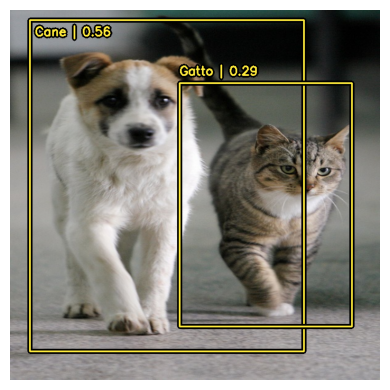

1/1 [==============================] - 0s 225ms/step


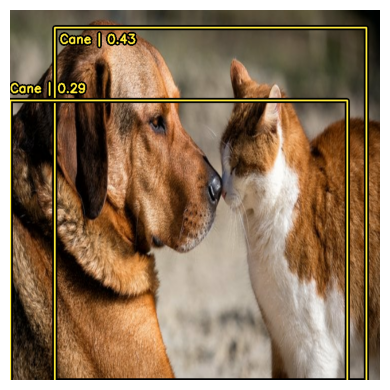

1/1 [==============================] - 0s 242ms/step


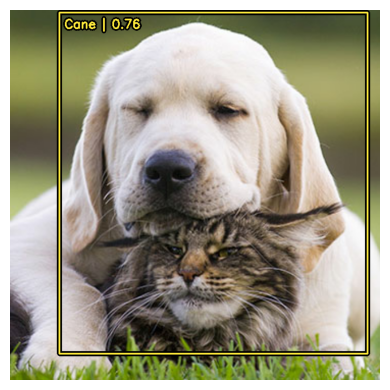

1/1 [==============================] - 0s 237ms/step


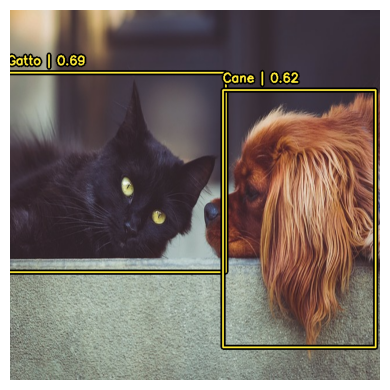

In [54]:
def visualize_generic(model, image_name, bounding_box_format):
    #images = load_image(os.path.join(path_images, image_name))
    image = tf.io.read_file(image_name)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [640,640])
    images = tf.cast(image, tf.float32)
    images = tf.expand_dims(images, axis=0)

    y_pred = model.predict(images)
    y_pred = bounding_box.to_ragged(y_pred)
    visualization.plot_bounding_box_gallery(
        images,
        value_range=(0, 255),
        bounding_box_format=bounding_box_format,
        #y_true={},
        y_pred=y_pred,
        scale=4,
        rows=1,
        cols=1,
        show=True,
        font_scale=0.7,
        class_mapping=class_mapping,
    )


# visualize_generic(yolo, image_name="../dataset1/test/00012_jpg.rf.f54b7ef0968cf6b0f990928d169e1a83.jpg", bounding_box_format="xyxy")
# visualize_generic(yolo, image_name="../dataset1/test/00041_jpg.rf.1b685611d13e60bfd19b1ad008eb81c9.jpg", bounding_box_format="xyxy")
# visualize_generic(yolo, image_name="../dataset1/test/00059_jpg.rf.f69bbdb4d09580675715e9a203470631.jpg", bounding_box_format="xyxy")
# visualize_generic(yolo, image_name="../dataset3/test/Chair-269-_jpg.rf.3a81b0889599ce42bc735ff199f7e536.jpg", bounding_box_format="xyxy")
# visualize_generic(yolo, image_name="../dataset3/test/Sofa-359-_jpg.rf.2995061f9eaae4bca7913b736e3e49a1.jpg", bounding_box_format="xyxy")
# visualize_generic(yolo, image_name="../dataset3/test/Chairs1-16-_jpg.rf.a4506ce899294f71c7fd534a42534144.jpg", bounding_box_format="xyxy")
# visualize_generic(yolo, image_name="../test_images/testimage_1.jpg", bounding_box_format="xyxy")
# visualize_generic(yolo, image_name="../test_images/testimage_2.jpg", bounding_box_format="xyxy")
# visualize_generic(yolo, image_name="../test_images/testimage_3.jpg", bounding_box_format="xyxy")
# visualize_generic(yolo, image_name="../test_images/testimage_4.jpg", bounding_box_format="xyxy")
# visualize_generic(yolo, image_name="../test_images/testimage_5.jpg", bounding_box_format="xyxy")

visualize_generic(yolo, image_name="../animali/valid/cane-e-gatto-insieme.jpg", bounding_box_format="xyxy")
visualize_generic(yolo, image_name="../animali/valid/183005673-110464f6-fd3c-42b8-9c38-553f0e46a50d.jpg", bounding_box_format="xyxy")
visualize_generic(yolo, image_name="../animali/valid/cani-gatti-litigano-m.jpg", bounding_box_format="xyxy")
visualize_generic(yolo, image_name="../animali/valid/dog-2606759_640.jpg", bounding_box_format="xyxy")

#img_0120_jpg.rf.36da0f1b2f59ec13cb70e1b82defd9a0.jpg